# Modelo de regresión logística múltiple


### Analizar una regresión logística la probabilidad de voto los encuestados. Describir los resultados del modelo. Perfilar al votante.

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels
from patsy import dmatrices
plt.rcParams['figure.figsize']=[5,5]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/My Drive/colabnote")

In [ ]:
data = pd.read_csv("elecciones.csv")
data.head()

,y,sexo,edad,ideo,op_gobierno
0,1,1,76,8,3
1,1,0,18,5,6
2,0,1,30,2,0
3,1,0,76,10,10
4,0,1,51,2,0


## Modelo multivariado

In [ ]:
multivariado = y, x = dmatrices('y ~ sexo + edad + ideo', data, return_type = 'dataframe')
x.head()

,Intercept,sexo,edad,ideo
0,1.0,1.0,76.0,8.0
1,1.0,0.0,18.0,5.0
2,1.0,1.0,30.0,2.0
3,1.0,0.0,76.0,10.0
4,1.0,1.0,51.0,2.0


In [ ]:
modelo_multivariado = statsmodels.discrete.discrete_model.Logit(y, x)
resultado_multivariado = modelo_multivariado.fit()
resultado_multivariado.summary()

Optimization terminated successfully.
         Current function value: 0.338185
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1200
Model:                          Logit   Df Residuals:                     1196
Method:                           MLE   Df Model:                            3
Date:                Mon, 21 Dec 2020   Pseudo R-squ.:                  0.5105
Time:                        03:49:31   Log-Likelihood:                -405.82
converged:                       True   LL-Null:                       -829.11
Covariance Type:            nonrobust   LLR p-value:                3.432e-183
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.2944      0.372    -14.213      0.000      -6.024      -4.564
sexo          -0.8565      0.184     -4.659      0.000      -1.217      -0.496
edad           0.0644      0.006     10.708      0.000       0.053       0.076
ideo           0.7080      0.038     18.410      0.000       0.633       0.783
==============================================================================
"""

### **Pseudo R-squ** indica que el modelo predice el 51% de probabilidad de votos encuestados.

### **LLR p-value** se lo utiliza para validar una hipótesis. Cuanto menor es el p-value, más significativa es la variable dentro de un modelo de regresión logística. En este caso son significativas.

### **Log-Likelihood** en comparación con los otros modelos, donde la relación entre variables es uno a uno, el modelo multivariado es el mejor, por presentar el Log-Likelihood menor.

### Entre las variables independientes trabajadas, la "ideología" es el factor más significativo en la relación; presenta el coeficiente más alto y el error standard más bajo. 

## Perfil del votante

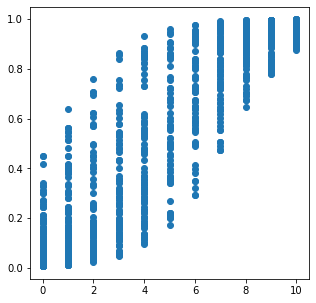

In [ ]:
ideologia = plt.scatter(data['ideo'], resultado_multivariado.predict(x))

In [ ]:
ideologia = y, x = dmatrices('y ~ ideo', data, return_type = 'dataframe')
x.head()

,Intercept,ideo
0,1.0,8.0
1,1.0,5.0
2,1.0,2.0
3,1.0,10.0
4,1.0,2.0


In [ ]:
modelo_ideologia = statsmodels.discrete.discrete_model.Logit(y, x)
resultado_ideologia = modelo_ideologia.fit()
resultado_ideologia.summary()

Optimization terminated successfully.
         Current function value: 0.406616
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1200
Model:                          Logit   Df Residuals:                     1198
Method:                           MLE   Df Model:                            1
Date:                Sun, 20 Dec 2020   Pseudo R-squ.:                  0.4115
Time:                        23:02:42   Log-Likelihood:                -487.94
converged:                       True   LL-Null:                       -829.11
Covariance Type:            nonrobust   LLR p-value:                2.072e-150
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4370      0.147    -16.540      0.000      -2.726      -2.148
ideo           0.5576      0.029     19.551      0.000       0.502       0.613
==============================================================================
"""

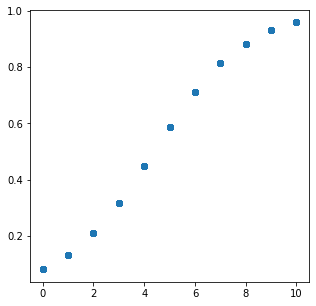

In [ ]:
plt.scatter(data['ideo'], resultado_ideologia.predict(x))

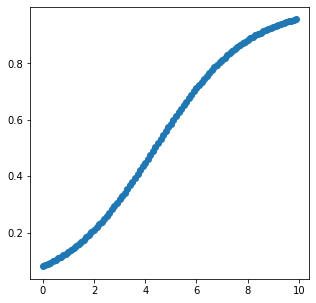

In [ ]:
ideologia_grafico = np.column_stack((np.ones(100),np.arange(0,10,.1)))
plt.scatter(np.arange(0,10,.1), resultado_ideologia.predict(ideologia_grafico))

### Mayor predisposición a votar al candidato cuanto más identificado se siente el encuestado con la derecha

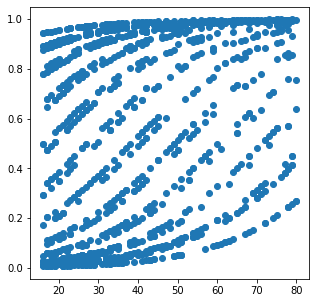

In [ ]:
edad = plt.scatter(data['edad'], resultado_multivariado.predict(x))

In [ ]:
edad = y, x = dmatrices('y ~ edad', data, return_type = 'dataframe')
x.head()

,Intercept,edad
0,1.0,76.0
1,1.0,18.0
2,1.0,30.0
3,1.0,76.0
4,1.0,51.0


In [ ]:
modelo_edad = statsmodels.discrete.discrete_model.Logit(y, x)
resultado_edad = modelo_edad.fit()
resultado_edad.summary()

Optimization terminated successfully.
         Current function value: 0.670713
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1200
Model:                          Logit   Df Residuals:                     1198
Method:                           MLE   Df Model:                            1
Date:                Sun, 20 Dec 2020   Pseudo R-squ.:                 0.02925
Time:                        23:03:25   Log-Likelihood:                -804.86
converged:                       True   LL-Null:                       -829.11
Covariance Type:            nonrobust   LLR p-value:                 3.295e-12
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8050      0.149     -5.409      0.000      -1.097      -0.513
edad           0.0235      0.003      6.786      0.000       0.017       0.030
==============================================================================
"""

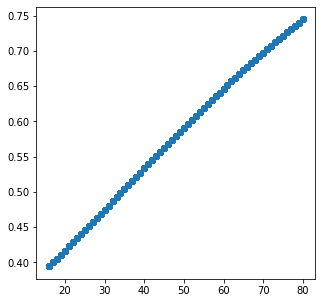

In [ ]:
plt.scatter(data['edad'], resultado_edad.predict(x))

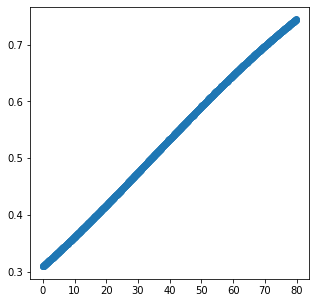

In [ ]:
edad_grafico = np.column_stack((np.ones(800),np.arange(0,80,.1)))
plt.scatter(np.arange(0,80,.1), resultado_edad.predict(edad_grafico))

### Mayor predisposición a votar al candidato cuanto mayor edad tiene el encuestado

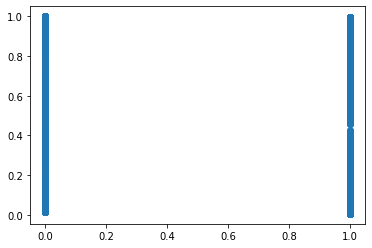

In [ ]:
sexo = plt.scatter(data['sexo'], resultado_multivariado.predict(x))

In [ ]:
sexo = y, x = dmatrices('y ~ sexo', data, return_type = 'dataframe')
x.head()

,Intercept,sexo
0,1.0,1.0
1,1.0,0.0
2,1.0,1.0
3,1.0,0.0
4,1.0,1.0


In [ ]:
modelo_sexo = statsmodels.discrete.discrete_model.Logit(y, x)
resultado_sexo = modelo_sexo.fit()
resultado_sexo.summary()

Optimization terminated successfully.
         Current function value: 0.687706
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1200
Model:                          Logit   Df Residuals:                     1198
Method:                           MLE   Df Model:                            1
Date:                Sun, 20 Dec 2020   Pseudo R-squ.:                0.004657
Time:                        23:04:02   Log-Likelihood:                -825.25
converged:                       True   LL-Null:                       -829.11
Covariance Type:            nonrobust   LLR p-value:                  0.005453
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2955      0.083      3.580      0.000       0.134       0.457
sexo          -0.3221      0.116     -2.774      0.006      -0.550      -0.095
==============================================================================
"""

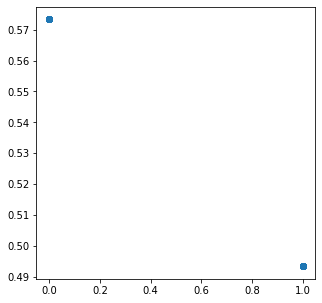

In [ ]:
plt.scatter(data['sexo'], resultado_sexo.predict(x))

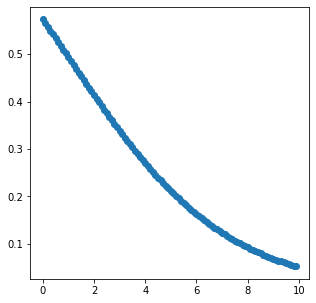

In [ ]:
sexo_grafico = np.column_stack((np.ones(100),np.arange(0,10,.1)))
plt.scatter(np.arange(0,10,.1), resultado_sexo.predict(sexo_grafico))

### Mayor predisposición a votar al candidato entre encuestados masculinos